In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [2]:
from collections import Counter

data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(data["attack_flag"]))

Counter({-1: 149915, 1: 67713})


## Transform to binary

In [3]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 149915, 0: 67713})


## Drop additional features

In [4]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


1    149915
0     67713
Name: attack_flag, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [6]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,10106,17989,udp


In [7]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,0.688859,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.462961,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [8]:
# removing NaNs
data = data.dropna()
data.shape

(217628, 18)

In [9]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [10]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [11]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

# a bit of feature engineering

## port numbers classification

In [12]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [13]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 211216, 1: 6412})
Counter({1: 150534, 0: 67094})
Counter({0: 156946, 1: 60682})


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Data columns (total 21 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [15]:
# data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool
0,40061,111,0,1,0
1,53488,80,0,0,1
2,35051,23,0,1,0
3,1408,445,0,1,0
4,55244,995,0,0,1
5,44544,995,0,1,0
6,50678,5900,0,0,1
7,35051,23,0,1,0
8,50678,5900,0,0,1
9,50678,5900,0,0,1


## Change port number info to categorical

In [16]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
data['src port'].nunique()
data['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [17]:
data.shape

(217628, 214)

## Hot one encoding

In [18]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Columns: 238 entries, conn len to state_SHR
dtypes: float64(7), int64(9), object(5), uint8(217)
memory usage: 81.6+ MB


## Plot function definition

In [20]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [21]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)

data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

sampled_data = data.loc[range(150000), :]

train_alg, validate_alg, test_alg = np.split(sampled_data, [int(.7*len(sampled_data)), int(.85*len(sampled_data))])

train_alg = train_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate_alg = validate_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test_alg = test_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train_alg = train_alg.sample(frac=1)
validate_alg = validate_alg.sample(frac=1)
test_alg = test_alg.sample(frac=1)

y_train_alg = train_alg.loc[:, "attack_flag"].values.ravel()
X_train_alg = train_alg.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate_alg = validate_alg.loc[:, "attack_flag"].values.ravel()
X_validate_alg = validate_alg.drop(["attack_flag"], axis=1).astype(np.float32)
y_test_alg = test_alg.loc[:, "attack_flag"].values.ravel()
X_test_alg = test_alg.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test_alg))
print(Counter(y_validate_alg))
print(Counter(y_train_alg))

Counter({0: 14952, 1: 7548})
Counter({1: 14607, 0: 7893})
Counter({1: 86179, 0: 18821})


In [22]:
data['src_port'] = data['src_port'].apply(lambda x: "src_" + x)
data['dst_port'] = data['dst_port'].apply(lambda x: "dst_" + x)

train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])


train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate = validate.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test = test.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1).astype(np.float32)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 30946, 0: 1699})
Counter({0: 22937, 1: 9707})
Counter({1: 109262, 0: 43077})


# Algoritms performance comparison

In [23]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
FNR = {}

Counter({1: 30946, 0: 1699})


In [24]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.94796, F1-score: 0.97328, Precision: 0.94796, Recall: 1.00000, FPR: 1.00000, FNR: 0.00000
TN:   0; FP: 1699; FN:    0; TP: 30946



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test)

name = "LogisticReg"

Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: LogisticReg  Accuracy: 0.97326, F1-score: 0.98587, Precision: 0.98780, Recall: 0.98394, FPR: 0.22131, FNR: 0.01606
TN: 1323; FP: 376; FN:  497; TP: 30449



In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier


seed = 12
num_trees = 45

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13), n_estimators=93),
               "RandomForest":RandomForestClassifier(n_estimators=178, max_depth=31, random_state=0),
}


for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    FNR[name] = fn/(tp+fn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98726, F1-score: 0.99326, Precision: 0.99642, Recall: 0.99011, FPR: 0.06474, FNR: 0.00989
TN: 1589; FP: 110; FN:  306; TP: 30640

Algorithm: DecisionTree Accuracy: 0.98759, F1-score: 0.99343, Precision: 0.99707, Recall: 0.98982, FPR: 0.05297, FNR: 0.01018
TN: 1609; FP:  90; FN:  315; TP: 30631

Algorithm: NaiveBayes   Accuracy: 0.92755, F1-score: 0.96037, Precision: 0.99749, Recall: 0.92590, FPR: 0.04238, FNR: 0.07410
TN: 1627; FP:  72; FN: 2293; TP: 28653

Algorithm: RandomTree   Accuracy: 0.98894, F1-score: 0.99415, Precision: 0.99714, Recall: 0.99118, FPR: 0.05180, FNR: 0.00882
TN: 1611; FP:  88; FN:  273; TP: 30673

Algorithm: RandomForest Accuracy: 0.98821, F1-score: 0.99376, Precision: 0.99633, Recall: 0.99121, FPR: 0.06651, FNR: 0.00879
TN: 1586; FP: 113; FN:  272; TP: 30674



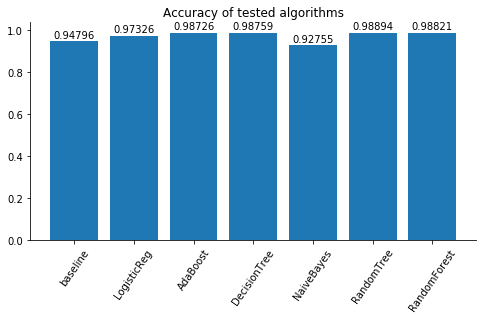

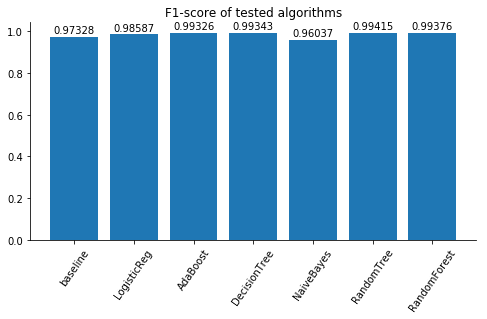

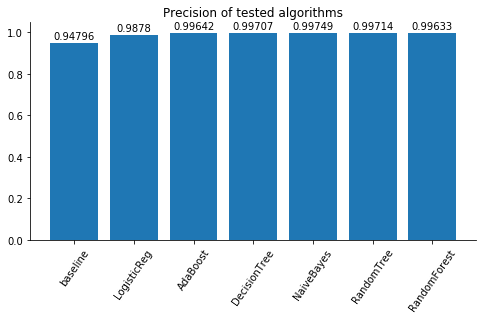

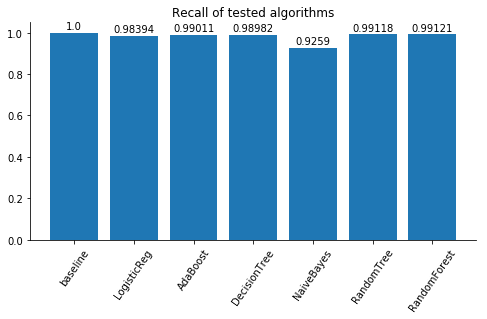

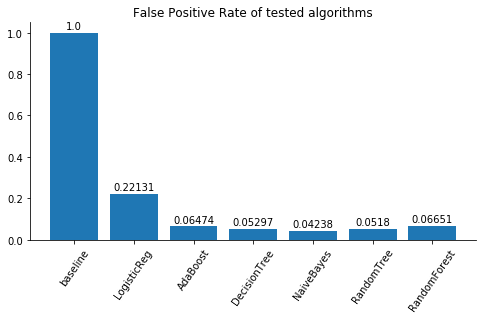

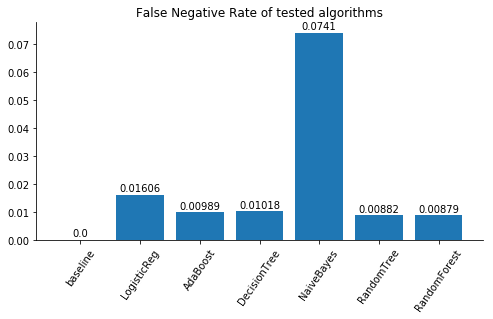

In [27]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)
plot_stats(FNR, "False Negative Rate", 8, 55)

# Random Features for Large-Scale Kernel Machines

In [28]:
import numpy as np
import tensorflow as tf
import time

In [29]:
X_train.values.shape

(152339, 232)

In [30]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(    
    x={"features": X_train.values},    
    y=y_train,    
    batch_size=180,    
    num_epochs=None,    
    shuffle=False)

In [31]:
X_validate.shape

(32644, 232)

In [32]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_validate.values},
    y=y_validate,
    batch_size=X_validate.shape[0],
    num_epochs=1,
    shuffle=False)

In [33]:
X_test.shape

(32645, 232)

In [34]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test.values},
    y=y_test,
    batch_size=X_test.shape[0],
    num_epochs=1,
    shuffle=False)

## Using explicit kernel mappings with the linear model

In [35]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool", 
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                    "Conn state" : "Conn_state" 
                    }, inplace=True)

In [36]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=len(X_train.columns.values))

In [37]:
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=len(X_train.columns.values), output_dim=5000, stddev=5, name='rffm')

In [38]:
kernel_mappers = {feat_column: [kernel_mapper]}

In [39]:
! rm -r kernel_train

In [40]:
optimizer = tf.train.FtrlOptimizer(learning_rate=25, l2_regularization_strength=0.001)

In [41]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
    n_classes=2,
    optimizer=optimizer,
    kernel_mappers=kernel_mappers, 
    model_dir="kernel_train")

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa530876358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_

In [42]:
estimator_kernel.fit(input_fn=train_input_fn, steps=8000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.6931474, step = 1
INFO:tensorflow:global_step/sec: 110.113
INFO:tensorflow:loss = 0.049137414, step = 101 (0.908 sec)
INFO:tensorflow:global_step/sec: 131.228
INFO:tensorflow:loss = 0.067286834, step = 201 (0.762 sec)
INFO:tensorflow:global_step/sec: 129.676
INFO:tensorflow:loss = 0.032155592, step = 301 (0.771 sec)
INF

INFO:tensorflow:loss = 0.009976852, step = 6101 (0.787 sec)
INFO:tensorflow:global_step/sec: 129.463
INFO:tensorflow:loss = 0.006024813, step = 6201 (0.773 sec)
INFO:tensorflow:global_step/sec: 126.245
INFO:tensorflow:loss = 0.0072238063, step = 6301 (0.792 sec)
INFO:tensorflow:global_step/sec: 126.693
INFO:tensorflow:loss = 0.0067242044, step = 6401 (0.790 sec)
INFO:tensorflow:global_step/sec: 127.309
INFO:tensorflow:loss = 0.006583132, step = 6501 (0.785 sec)
INFO:tensorflow:global_step/sec: 127.571
INFO:tensorflow:loss = 0.024788486, step = 6601 (0.784 sec)
INFO:tensorflow:global_step/sec: 126.667
INFO:tensorflow:loss = 0.022964207, step = 6701 (0.790 sec)
INFO:tensorflow:global_step/sec: 126.266
INFO:tensorflow:loss = 0.0049038134, step = 6801 (0.793 sec)
INFO:tensorflow:global_step/sec: 126.235
INFO:tensorflow:loss = 0.005774965, step = 6901 (0.791 sec)
INFO:tensorflow:global_step/sec: 126.155
INFO:tensorflow:loss = 0.034280207, step = 7001 (0.793 sec)
INFO:tensorflow:global_step/

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7fa5308dcfd0>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x7fa5308dcc18>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=232, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x7fa5308dcbe0>]}})

In [43]:
eval_metrics = estimator_kernel.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-06-12-07:14:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-12-07:14:55
INFO:tensorflow:Saving dict for global step 8000: accuracy = 0.9983764, accuracy/baseline_label_mean = 0.2973594, accuracy/threshold_0.500000_mean = 0.9983764, auc = 0.9999087, auc_precision_recall = 0.999759, global_step = 8000, labels/actual_label_mean = 0.2973594, labels/prediction_mean = 0.29662213, loss = 0.00682516, precision/positive_threshold_0.500000_mean = 0.9955852, recall/positive_threshold_0.500000_mean = 0.9989698


In [44]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.9983764
accuracy/baseline_label_mean: 0.2973594
accuracy/threshold_0.500000_mean: 0.9983764
auc: 0.9999087
auc_precision_recall: 0.999759
global_step: 8000
labels/actual_label_mean: 0.2973594
labels/prediction_mean: 0.29662213
loss: 0.00682516
precision/positive_threshold_0.500000_mean: 0.9955852
recall/positive_threshold_0.500000_mean: 0.9989698


In [45]:
correctness = []
class_id = []
pred_iterator = None

In [46]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [48]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test, class_id)
F1S[name] = metrics.f1_score(y_test, class_id)
Prec[name] = metrics.precision_score(y_test, class_id)
Rec[name] = metrics.recall_score(y_test, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, class_id).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RFFM         Accuracy: 0.99354, F1-score: 0.99659, Precision: 0.99542, Recall: 0.99777, FPR: 0.08358, FNR: 0.00223
TN: 1557; FP: 142; FN:   69; TP: 30877



# Neural network part

In [49]:
import collections
import io
import math
import tensorflow as tf
from IPython import display

In [50]:
deep_numeric_feat = ["Same_srv_rate", "Serror_rate", "Srv_serror_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_src_port_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "well_known_src_pool", "registered_src_pool", "cli_src_pool"]
wide_numeric_feat = ["conn_len",  "src_bytes", "dst_bytes", "conn_numb"]
categorical_feat = ["service", "Conn_state", "src_port", "dst_port", "proto"]

In [51]:
deep_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in deep_numeric_feat]
wide_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in wide_numeric_feat]

In [52]:
src_port_mod = data["src_port"].unique().tolist()
src_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'src_port', src_port_mod)

dst_port_mod = data["dst_port"].unique().tolist()
dst_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'dst_port', dst_port_mod)

service = tf.feature_column.categorical_column_with_vocabulary_list(
    'service', data["service"].unique().tolist())

Conn_state = tf.feature_column.categorical_column_with_vocabulary_list(
    'Conn_state', data["Conn_state"].unique().tolist())

proto = tf.feature_column.categorical_column_with_vocabulary_list(
    'proto', data["proto"].unique().tolist())

In [53]:
deep_columns = [
    tf.feature_column.indicator_column(service),
    tf.feature_column.indicator_column(Conn_state),
    tf.feature_column.indicator_column(proto),
    tf.feature_column.embedding_column(src_port, dimension=10),
    tf.feature_column.embedding_column(dst_port, dimension=6),
]

In [54]:
crossed_columns = [
      tf.feature_column.crossed_column(
          ['src_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'src_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'dst_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'conn_numb'], hash_bucket_size=10000),  
      tf.feature_column.crossed_column(
          ['service', 'proto'], hash_bucket_size=100),
    
  ]

In [55]:
! rm -r NN_model

In [56]:
NN_model = tf.estimator.DNNLinearCombinedClassifier(
    model_dir = "/home/matz/Desktop/ml_ids/NN_model",
    linear_optimizer = tf.train.FtrlOptimizer(learning_rate=3, l2_regularization_strength=0.001),
    linear_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf + crossed_columns,
    dnn_activation_fn=tf.nn.selu,
    dnn_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf,
    dnn_hidden_units = [950, 550, 300, 175]
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/matz/Desktop/ml_ids/NN_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa51858d5f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
feature_set= deep_numeric_feat + wide_numeric_feat + categorical_feat

In [58]:
def get_input_fn(data_set, num_epochs=None, n_batch = 256, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in feature_set}),
       y = pd.Series(data_set["attack_flag"].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [59]:
NN_model.train(input_fn=get_input_fn(train_ex, n_batch=180), steps=20000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /home/matz/Desktop/ml_ids/NN_model/model.ckpt.
INFO:tensorflow:loss = 104.5662, step = 1
INFO:tensorflow:global_step/sec: 64.8931
INFO:tensorflow:loss = 85.66586, step = 101 (1.542 sec)
INFO:tensorflow:global_step/sec: 79.3847
INFO:tensorflow:loss = 1.9838582e-07, step = 201 (1.260 sec)
INFO:tensorflow:global_step/sec: 80.9533
INFO:tensorflow:loss = 0.513646, step = 301 (1.235 sec)
INFO:tensorflow:global_step/sec: 77.2875
INFO:tensorflow:loss = 259.70264, step = 401 (1.294 sec)
INFO:tensorflow:global_step/sec: 77.6559
INFO:tensorflow:loss = 2.2262657, step = 501 (1.288 sec)
INFO:tensorflow:global_step/sec: 80.2

INFO:tensorflow:global_step/sec: 79.2923
INFO:tensorflow:loss = 1.3680773e-10, step = 7601 (1.262 sec)
INFO:tensorflow:global_step/sec: 79.8704
INFO:tensorflow:loss = 511.44888, step = 7701 (1.252 sec)
INFO:tensorflow:global_step/sec: 74.7551
INFO:tensorflow:loss = 18.342834, step = 7801 (1.338 sec)
INFO:tensorflow:global_step/sec: 75.9053
INFO:tensorflow:loss = 0.03094359, step = 7901 (1.317 sec)
INFO:tensorflow:global_step/sec: 78.4644
INFO:tensorflow:loss = 94.52316, step = 8001 (1.274 sec)
INFO:tensorflow:global_step/sec: 79.2078
INFO:tensorflow:loss = 2.7896473e-13, step = 8101 (1.263 sec)
INFO:tensorflow:global_step/sec: 79.3629
INFO:tensorflow:loss = 92.12877, step = 8201 (1.260 sec)
INFO:tensorflow:global_step/sec: 83.6641
INFO:tensorflow:loss = 5.3809294e-11, step = 8301 (1.195 sec)
INFO:tensorflow:global_step/sec: 79.7835
INFO:tensorflow:loss = 2.7565966e-08, step = 8401 (1.254 sec)
INFO:tensorflow:global_step/sec: 76.7888
INFO:tensorflow:loss = 0.010779044, step = 8501 (1.30

INFO:tensorflow:global_step/sec: 82.1077
INFO:tensorflow:loss = 8.796061e-06, step = 15701 (1.218 sec)
INFO:tensorflow:global_step/sec: 77.0957
INFO:tensorflow:loss = 2.0815267e-07, step = 15801 (1.297 sec)
INFO:tensorflow:global_step/sec: 77.1209
INFO:tensorflow:loss = 4.658706e-09, step = 15901 (1.297 sec)
INFO:tensorflow:global_step/sec: 73.4936
INFO:tensorflow:loss = 0.00010881483, step = 16001 (1.361 sec)
INFO:tensorflow:global_step/sec: 77.1655
INFO:tensorflow:loss = 1.9286148e-05, step = 16101 (1.296 sec)
INFO:tensorflow:global_step/sec: 77.9388
INFO:tensorflow:loss = 10.312803, step = 16201 (1.283 sec)
INFO:tensorflow:global_step/sec: 82.0115
INFO:tensorflow:loss = 0.002317175, step = 16301 (1.220 sec)
INFO:tensorflow:global_step/sec: 81.3562
INFO:tensorflow:loss = 4.561781, step = 16401 (1.229 sec)
INFO:tensorflow:global_step/sec: 77.1846
INFO:tensorflow:loss = 0.012675556, step = 16501 (1.296 sec)
INFO:tensorflow:global_step/sec: 76.9221
INFO:tensorflow:loss = 12.19148, step 

In [60]:
eval_metrics = NN_model.evaluate(input_fn=get_input_fn(validate_ex, n_batch=validate_ex.shape[0], shuffle=False), steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-12-07:19:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-12-07:19:22
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.9952824, accuracy_baseline = 0.7026406, auc = 0.9969023, auc_precision_recall = 0.9957713, average_loss = 0.17119467, global_step = 20000, label/mean = 0.2973594, loss = 5588.479, precision = 0.9942059, prediction/mean = 0.29593167, recall = 0.98990417
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000


In [61]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.9952824
accuracy_baseline: 0.7026406
auc: 0.9969023
auc_precision_recall: 0.9957713
average_loss: 0.17119467
global_step: 20000
label/mean: 0.2973594
loss: 5588.479
precision: 0.9942059
prediction/mean: 0.29593167
recall: 0.98990417


In [62]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_ex, num_epochs=1, n_batch = test_ex.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [63]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

y_pred_NN = [int(a) for a in y_pred]

In [64]:
from sklearn import metrics
name = "Wide&Deep"

Acc[name] = metrics.accuracy_score(test_ex["attack_flag"], y_pred_NN)
F1S[name] = metrics.f1_score(test_ex["attack_flag"], y_pred_NN)
Prec[name] = metrics.precision_score(test_ex["attack_flag"], y_pred_NN)
Rec[name] = metrics.recall_score(test_ex["attack_flag"], y_pred_NN)
tn, fp, fn, tp = metrics.confusion_matrix(test_ex["attack_flag"], y_pred_NN).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: Wide&Deep    Accuracy: 0.98180, F1-score: 0.99039, Precision: 0.99206, Recall: 0.98872, FPR: 0.14420, FNR: 0.01128
TN: 1454; FP: 245; FN:  349; TP: 30597



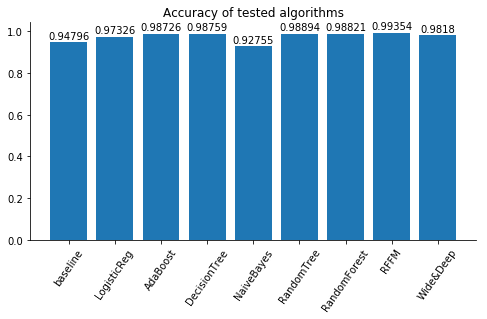

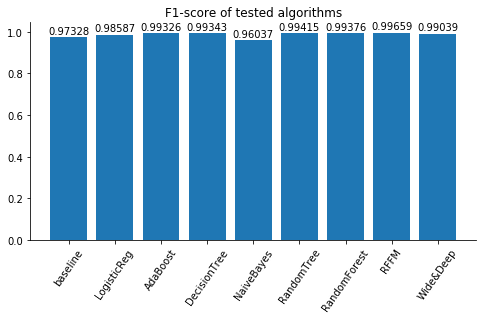

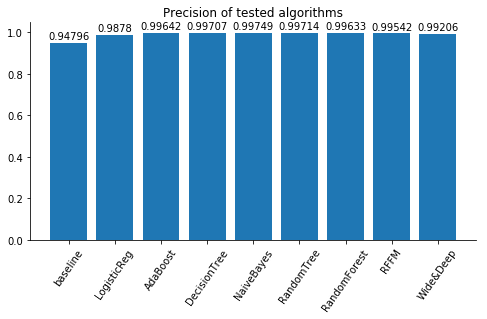

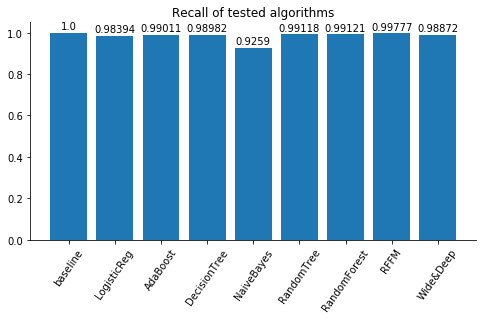

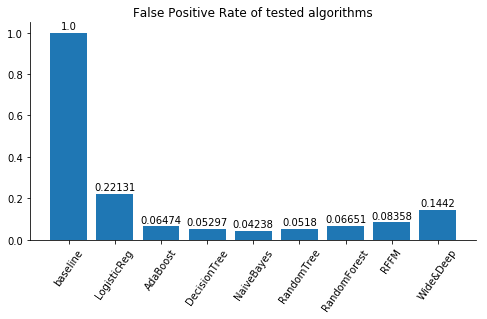

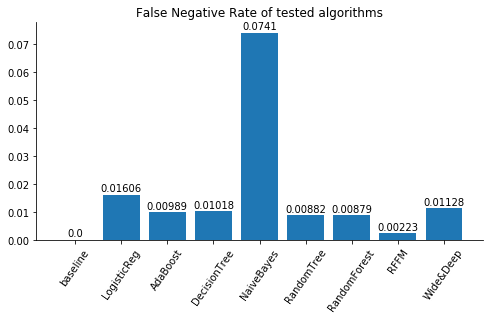

In [65]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)
plot_stats(FNR, "False Negative Rate", 8, 55)

## Results comparison

In [66]:
y_pred = {}

In [67]:
y_pred["RFFM"] = class_id
y_pred["Wide&Deep"] = y_pred_NN

In [68]:
# Metrics of baseline method

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)

In [69]:
classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13), n_estimators=93),
               "RandomForest":RandomForestClassifier(n_estimators=178, max_depth=31, random_state=0),
              }

name = "LogisticReg"
model = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
y_pred[name] = model.predict(X_test)

for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred[name] = model.predict(X_test)

In [70]:
print(len(y_pred["Wide&Deep"]))
print(len(y_pred["RFFM"]))
print(len(y_pred["AdaBoost"]))

32645
32645
32645


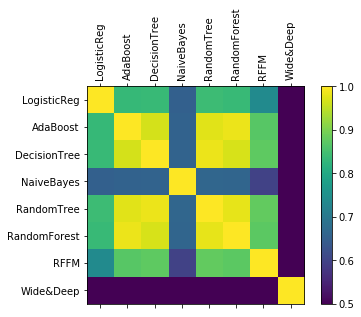

In [71]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "Wide&Deep"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [72]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.834581      0.837733    0.654069    0.843351   
AdaBoost         0.834581  1.000000      0.968509    0.657696    0.977235   
DecisionTree     0.837733  0.968509      1.000000    0.659435    0.986130   
NaiveBayes       0.654069  0.657696      0.659435    1.000000    0.664510   
RandomTree       0.843351  0.977235      0.986130    0.664510    1.000000   
RandomForest     0.836977  0.985521      0.969293    0.662160    0.980853   
RFFM             0.738493  0.870604      0.876012    0.598981    0.880592   
Wide&Deep       -0.000888 -0.002627     -0.003567   -0.005571   -0.002193   

              RandomForest      RFFM  Wide&Deep  
LogisticReg       0.836977  0.738493  -0.000888  
AdaBoost          0.985521  0.870604  -0.002627  
DecisionTree      0.969293  0.876012  -0.003567  
NaiveBayes        0.662160  0.598981  -0.005571  
RandomTree        0.980853  0.880592  -0.002193  
Random

In [73]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []
failures["RFFM"] = []
failures["Wide&Deep"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(10)
        else:
            failures[key].append(1)

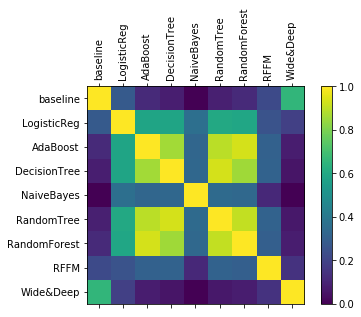

In [74]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "Wide&Deep"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [75]:
print(correlations)

              baseline  LogisticReg  AdaBoost  DecisionTree  NaiveBayes  \
baseline      1.000000     0.282582  0.119290      0.085872   -0.027178   
LogisticReg   0.282582     1.000000  0.583391      0.585238    0.363861   
AdaBoost      0.119290     0.583391  1.000000      0.859969    0.328321   
DecisionTree  0.085872     0.585238  0.859969      1.000000    0.333787   
NaiveBayes   -0.027178     0.363861  0.328321      0.333787    1.000000   
RandomTree    0.089555     0.604095  0.896990      0.935902    0.345842   
RandomForest  0.118758     0.590448  0.935771      0.859337    0.338354   
RFFM          0.225481     0.254377  0.309344      0.315582    0.114599   
Wide&Deep     0.656258     0.188721  0.081532      0.058196   -0.020059   

              RandomTree  RandomForest      RFFM  Wide&Deep  
baseline        0.089555      0.118758  0.225481   0.656258  
LogisticReg     0.604095      0.590448  0.254377   0.188721  
AdaBoost        0.896990      0.935771  0.309344   0.081532  
D

In [76]:
cont_table = [[],[]]
for name in failures.keys():
    print(Counter(failures[name]))
    cont_table[0].append(float(Counter(failures[name])[1]))
    cont_table[1].append(float(Counter(failures[name])[10]))
print(cont_table)

Counter({1: 30946, 10: 1699})
Counter({1: 31772, 10: 873})
Counter({1: 32233, 10: 412})
Counter({1: 32240, 10: 405})
Counter({1: 30280, 10: 2365})
Counter({1: 32268, 10: 377})
Counter({1: 32260, 10: 385})
Counter({1: 32434, 10: 211})
Counter({1: 29313, 10: 3332})
[[30946.0, 31772.0, 32233.0, 32240.0, 30280.0, 32268.0, 32260.0, 32434.0, 29313.0], [1699.0, 873.0, 412.0, 405.0, 2365.0, 377.0, 385.0, 211.0, 3332.0]]


In [77]:
from scipy import stats

# test of independence
# H0 : results are independent

stat, p, dof, expected = stats.chi2_contingency(cont_table)
stats.chi2_contingency(cont_table)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('\nreject H0 - results dependent')
else:
    print('\nfailed to reject H0 - results independent')

probability=0.950, critical=15.507, stat=9051.514

reject H0 - results dependent


## New data prediction

In [78]:
test_set = pd.read_csv("20151221.txt", sep = "\t", header = None)
test_set.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(test_set["attack_flag"]))

Counter({-1: 210159, 1: 2830})


In [79]:
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-2, -1)
test_set.loc[:, "attack_flag"] = test_set.loc[:, "attack_flag"] * -1
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(test_set["attack_flag"]))

Counter({1: 210159, 0: 2830})


In [80]:
# slice dataset, drop additional features
print(test_set.shape)
test_set = test_set.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(test_set.shape)

# drop software markers
test_set = test_set.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_set["attack_flag"].value_counts()

(212989, 24)
(212989, 21)


1    210159
0      2830
Name: attack_flag, dtype: int64

In [81]:
# removing NaNs
test_set = test_set.dropna()
test_set.shape

(212989, 18)

In [82]:
test_set["well-known src pool"] = test_set.apply(wk, axis=1)
test_set["registered src pool"] = test_set.apply(reg, axis=1)
test_set["cli src pool"] = test_set.apply(cli, axis=1)

In [83]:
test_set["src port"] = test_set["src port"].apply(str)
test_set["dst port"] = test_set["dst port"].apply(str)
test_set['src port'].nunique()
test_set['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = test_set['src port'].value_counts()
counts2 = test_set['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [84]:
### hot one encoding ###

# hot one encoding for service
test_set = pd.concat([test_set, pd.get_dummies(test_set["service"], prefix="is")], axis=1)
test_set.tail(10)

#hot one encoding for proto - commented due to reduced column number
test_set = pd.concat([test_set, pd.get_dummies(test_set["proto"], prefix="is")], axis=1)
test_set.tail(10)

# hot one encoding for conn state
test_set = pd.concat([test_set, pd.get_dummies(test_set["Conn state"], prefix="state")], axis=1)
test_set.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_OTH,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SHR
212979,0.000061,other,0,0,20,1.0,0.05,0.15,2,85,...,0,1,0,0,0,0,0,0,0,0
212980,0.000000,other,0,0,1,1.0,0.00,0.22,4,6,...,0,0,0,0,0,0,1,0,0,0
212981,0.000013,other,0,0,13,1.0,0.08,0.26,6,84,...,0,1,0,0,0,0,0,0,0,0
212982,0.000029,other,0,0,2,1.0,0.50,0.25,1,6,...,0,1,0,0,0,0,0,0,0,0
212983,0.000039,other,0,0,14,1.0,0.07,0.24,1,84,...,0,1,0,0,0,0,0,0,0,0
212984,0.000045,other,0,0,15,1.0,0.07,0.23,3,84,...,0,1,0,0,0,0,0,0,0,0
212985,0.000053,other,0,0,16,1.0,0.06,0.22,19,84,...,0,1,0,0,0,0,0,0,0,0
212986,0.000056,other,0,0,17,1.0,0.06,0.21,7,84,...,0,1,0,0,0,0,0,0,0,0
212987,0.000058,other,0,0,18,1.0,0.06,0.20,20,84,...,0,1,0,0,0,0,0,0,0,0
212988,0.000110,dns,36,194,1,1.0,0.00,0.50,0,89,...,0,0,0,0,0,0,0,0,1,0


In [85]:
test_set.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [86]:
# check differences between datasets after hot one encoding

test_new_data_full = test_set
    
print(test_set.columns.difference(data.columns))  
test_set.shape

Index(['is_dns,sip', 'is_dst_102', 'is_dst_10200', 'is_dst_1081', 'is_dst_119',
       'is_dst_135', 'is_dst_143', 'is_dst_223', 'is_dst_389', 'is_dst_5432',
       'is_dst_6050', 'is_dst_631', 'is_dst_82', 'is_dst_88', 'is_dst_9080',
       'is_src_0', 'is_src_13941', 'is_src_18382', 'is_src_21320',
       'is_src_22055', 'is_src_22206', 'is_src_22207', 'is_src_2295',
       'is_src_29174', 'is_src_300', 'is_src_37286', 'is_src_37396',
       'is_src_37511', 'is_src_38396', 'is_src_40082', 'is_src_40718',
       'is_src_41161', 'is_src_41287', 'is_src_41708', 'is_src_41793',
       'is_src_42206', 'is_src_443', 'is_src_4445', 'is_src_46432',
       'is_src_49354', 'is_src_49362', 'is_src_49376', 'is_src_49414',
       'is_src_5061', 'is_src_5071', 'is_src_5094', 'is_src_5100',
       'is_src_5114', 'is_src_51361', 'is_src_5187', 'is_src_5208',
       'is_src_5211', 'is_src_52131', 'is_src_5229', 'is_src_5247',
       'is_src_53265', 'is_src_53451', 'is_src_53762', 'is_src_54110',
    

(212989, 193)

In [87]:
test_new_data = test_set.loc[range(30000), :]

for c in data.columns.difference(test_new_data.columns):
    test_new_data[c] = 0
for c in test_new_data.columns.difference(data.columns):
    test_new_data = test_new_data.drop(c, axis=1)

test_new_data = test_new_data.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
    
test_new_data = test_new_data.sample(frac=1)
y_test_new_data = test_new_data.loc[:, "attack_flag"].values.ravel()
X_test_new_data = test_new_data.drop(["attack_flag"], axis=1).astype(np.float32)

In [88]:
print(X_test_new_data.shape)
print(X_test.shape)
print(test_new_data["attack_flag"].value_counts())

(30000, 232)
(32645, 232)
1    29498
0      502
Name: attack_flag, dtype: int64


In [89]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test_new_data.mean() > (1-y_test_new_data.mean())):
    y_pred = np.ones(len(y_test_new_data)).ravel() 
else:
    y_pred = np.zeros(len(y_test_new_data)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000, FNR: 0.00000
TN:   0; FP: 502; FN:    0; TP: 29498



In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test_new_data)

name = "LogisticReg"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: LogisticReg  Accuracy: 0.98183, F1-score: 0.99083, Precision: 0.98324, Recall: 0.99854, FPR: 1.00000, FNR: 0.00146
TN:   0; FP: 502; FN:   43; TP: 29455



In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13), n_estimators=93),
               "RandomForest":RandomForestClassifier(n_estimators=178, max_depth=31, random_state=0),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred = model.predict(X_test_new_data)
    
    Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
    F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
    Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
    Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    FNR[name] = fn/(tp+fn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98017, F1-score: 0.98998, Precision: 0.98331, Recall: 0.99675, FPR: 0.99402, FNR: 0.00325
TN:   3; FP: 499; FN:   96; TP: 29402

Algorithm: DecisionTree Accuracy: 0.98797, F1-score: 0.99388, Precision: 0.99363, Recall: 0.99414, FPR: 0.37450, FNR: 0.00586
TN: 314; FP: 188; FN:  173; TP: 29325

Algorithm: NaiveBayes   Accuracy: 0.98320, F1-score: 0.99153, Precision: 0.98327, Recall: 0.99993, FPR: 1.00000, FNR: 0.00007
TN:   0; FP: 502; FN:    2; TP: 29496

Algorithm: RandomTree   Accuracy: 0.99003, F1-score: 0.99495, Precision: 0.99221, Recall: 0.99769, FPR: 0.46016, FNR: 0.00231
TN: 271; FP: 231; FN:   68; TP: 29430

Algorithm: RandomForest Accuracy: 0.95563, F1-score: 0.97731, Precision: 0.98279, Recall: 0.97190, FPR: 1.00000, FNR: 0.02810
TN:   0; FP: 502; FN:  829; TP: 28669



In [92]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test_new_data.values},
    y=y_test_new_data,
    batch_size=X_test_new_data.shape[0],
    num_epochs=1,
    shuffle=False)

In [93]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [94]:
class_id = []

for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])

In [95]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test_new_data, class_id)
F1S[name] = metrics.f1_score(y_test_new_data, class_id)
Prec[name] = metrics.precision_score(y_test_new_data, class_id)
Rec[name] = metrics.recall_score(y_test_new_data, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, class_id).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RFFM         Accuracy: 0.99007, F1-score: 0.99496, Precision: 0.99235, Recall: 0.99759, FPR: 0.45219, FNR: 0.00241
TN: 275; FP: 227; FN:   71; TP: 29427



In [96]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_new_data_full.loc[range(30000), :], num_epochs=1, n_batch = X_test.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [97]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

In [98]:
name = "Wide&Deep"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: Wide&Deep    Accuracy: 0.96373, F1-score: 0.98152, Precision: 0.98346, Recall: 0.97959, FPR: 0.96813, FNR: 0.02041
TN:  16; FP: 486; FN:  602; TP: 28896



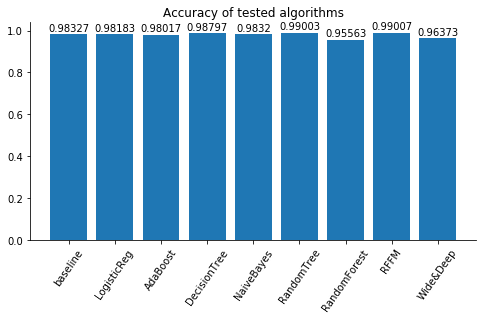

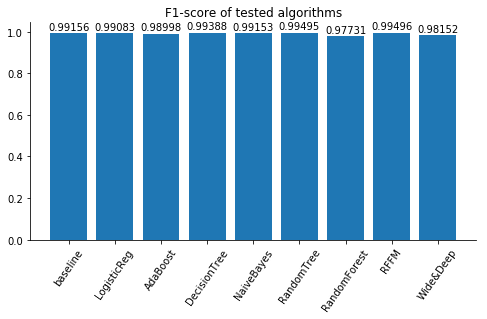

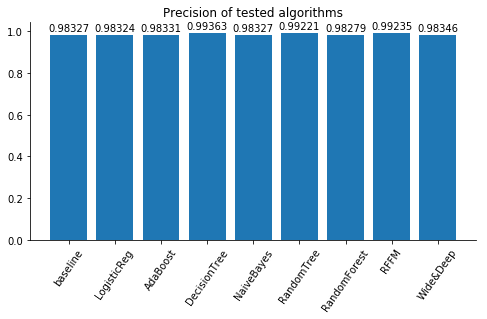

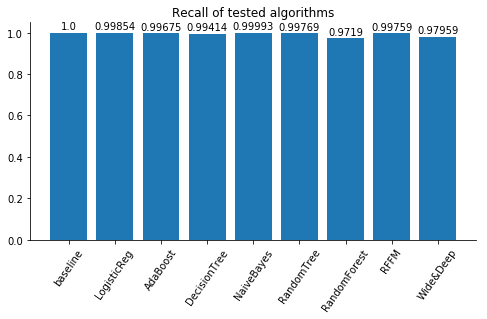

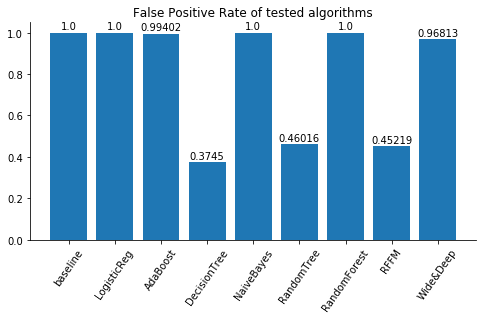

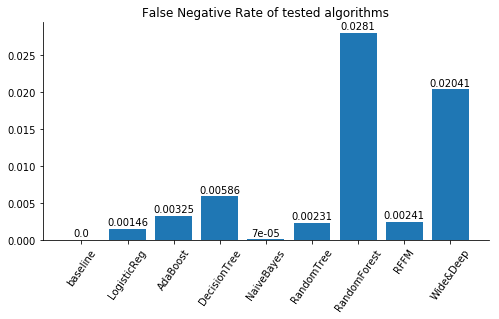

In [99]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)
plot_stats(FNR, "False Negative Rate", 8, 55)